# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

### Team members:

+ Emmanuel Francisco González Velázquez - A01364577
+ Oscar Israel Lerma Franco - A01380817
+ Jesús Mario Martínez Díaz - A01740049
+ Eduardo Selim Martínez Mayorga - A01795167
+ José Antonio Hernández Hernández

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 5 or 6 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

In [11]:
!pip install jupyterthemes

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt
#only if you have jupyterthemes
from jupyterthemes import jtplot
jtplot.style()

### Download Cifar10 dataset

In [3]:
torch.cuda.is_available()

False

In [4]:
# DATA_PATH = '/media/pepe/DataUbuntu/Databases/asl_data/'
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/MyDrive/amlm/cifar-10'
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
#Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

Mounted at /content/drive


100%|██████████| 170498071/170498071 [00:03<00:00, 43875469.02it/s]


Extracting /content/drive/MyDrive/amlm/cifar-10/cifar-10-python.tar.gz to /content/drive/MyDrive/amlm/cifar-10
Files already downloaded and verified
Files already downloaded and verified


In [5]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/drive/MyDrive/amlm/cifar-10
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [6]:
train_loader.batch_size

64

In [7]:
for i, (x, y) in enumerate(train_loader):
    print(x, y)

Streaming output truncated to the last 5000 lines.
          [-2.0834e-01, -1.5993e-01,  3.2422e-01,  ..., -8.8615e-01,
           -8.0545e-01, -6.4407e-01],
          [-4.0200e-01, -3.0517e-01,  8.2143e-02,  ..., -7.0863e-01,
           -7.7318e-01, -7.2476e-01]],

         [[-4.8058e-01, -4.5053e-01, -4.8058e-01,  ..., -3.6038e-01,
           -5.4068e-01, -8.8626e-01],
          [-5.2566e-01, -4.8058e-01, -4.9561e-01,  ..., -6.0078e-01,
           -7.9611e-01, -1.1417e+00],
          [-5.5571e-01, -4.8058e-01, -4.6555e-01,  ..., -7.8108e-01,
           -6.9093e-01, -9.1631e-01],
          ...,
          [-7.5103e-01, -6.4586e-01, -2.4018e-01,  ..., -9.7641e-01,
           -9.4636e-01, -7.5103e-01],
          [-3.1530e-01, -3.1530e-01, -2.9825e-02,  ..., -1.0215e+00,
           -8.8626e-01, -7.5103e-01],
          [-4.8058e-01, -4.2048e-01, -2.2515e-01,  ..., -8.8626e-01,
           -8.4118e-01, -8.1113e-01]]],


        [[[ 2.0607e+00,  2.0449e+00,  1.9813e+00,  ...,  2.0607e+00,
   

### Using  GPUs

In [12]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cpu


### Mostrar imágenes

La imagen muestreada representa un: automobile


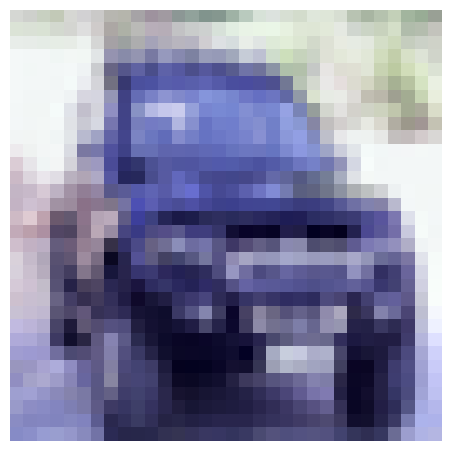

In [9]:
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)


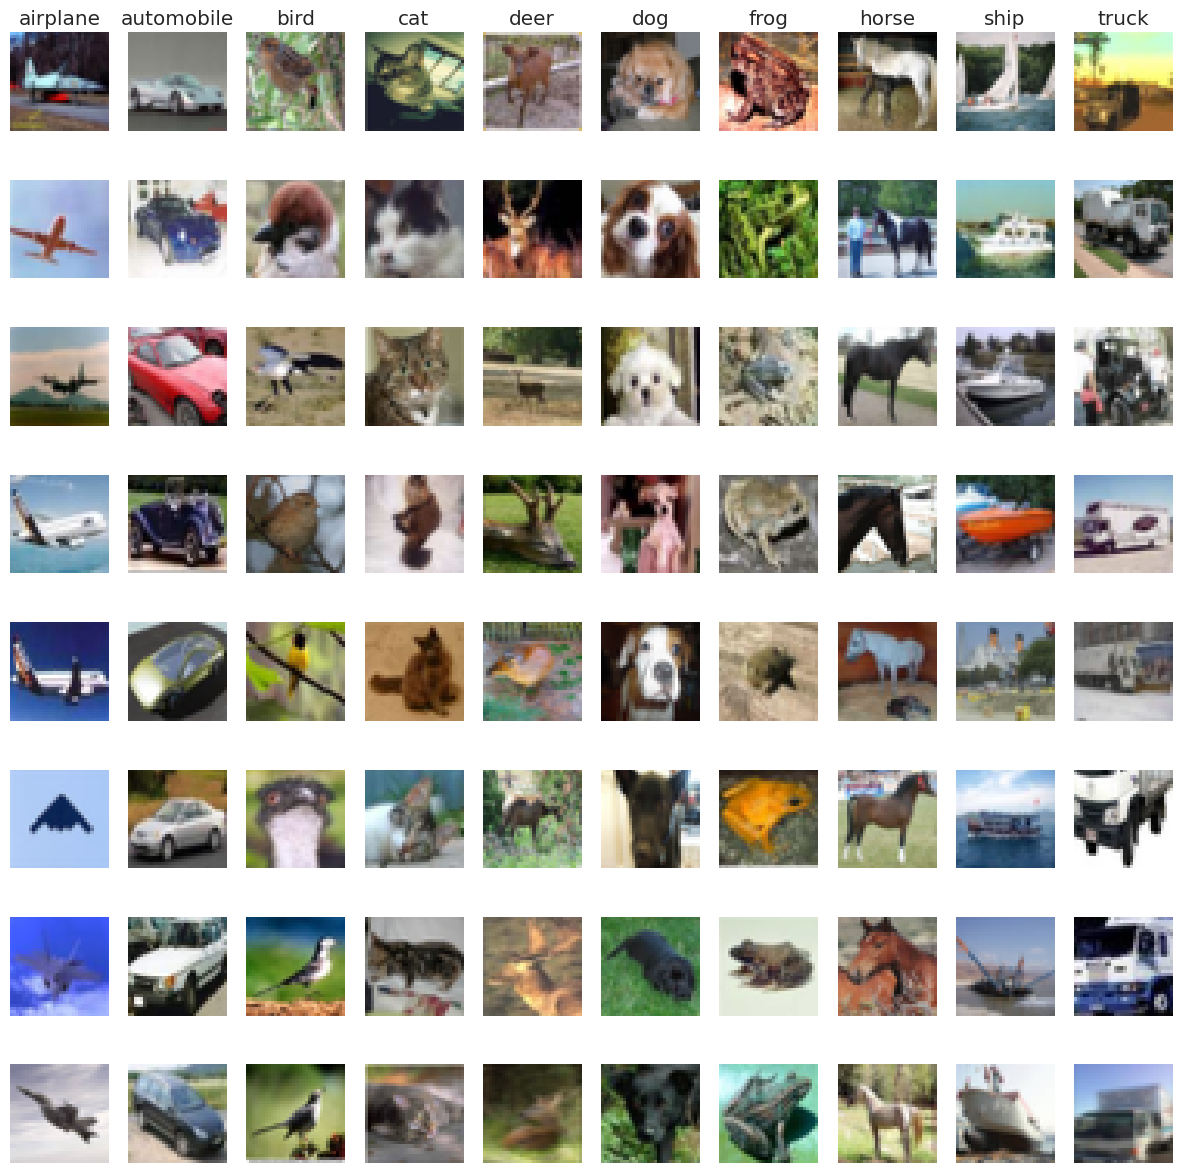

In [10]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid()

### Calcular accuracy


In [13]:
def accuracy(model, loader):
    # Set model to evaluation mode
    model.eval()

    correct = 0
    total = 0

    # No need to track gradients for validation/testing
    with torch.no_grad():
        for data in loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)  # Send inputs and labels to the device (CPU/GPU)

            # Forward pass to get predictions
            outputs = model(inputs)

            # Get the predicted class with the highest score
            _, predicted = torch.max(outputs.data, 1)

            # Increment correct predictions and total samples
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate accuracy
    return 100 * correct / total

### Loop de entrenamiento

In [14]:
def train(model, optimizer, train_loader, val_loader, criterion, epochs=100):
    # Move the model to the device (GPU/CPU)
    model = model.to(device)

    # Store the loss history for later visualization
    train_loss_history = []
    val_loss_history = []
    val_accuracy_history = []

    for epoch in range(epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0

        # Iterate over batches of data
        for i, (inputs, labels) in enumerate(train_loader):
            # Move inputs and labels to the device
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients to avoid accumulating them
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()  # Compute gradients
            optimizer.step()  # Update weights

            # Accumulate loss
            running_loss += loss.item()

        # Calculate the average training loss for the epoch
        avg_train_loss = running_loss / len(train_loader)
        train_loss_history.append(avg_train_loss)

        # Validation phase
        model.eval()  # Set model to evaluation mode
        val_loss = 0.0
        with torch.no_grad():
            correct = 0
            total = 0
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                # Calculate accuracy
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = 100 * correct / total

        val_loss_history.append(avg_val_loss)
        val_accuracy_history.append(val_accuracy)

        # Print epoch summary
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

    return train_loss_history, val_loss_history, val_accuracy_history

### Linear model

In [19]:
import torch.nn as nn

class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # A single fully connected layer from input (32*32*3 = 3072) to output (10 classes)
        self.fc = nn.Linear(32*32*3, 10)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc(x)
        return x
# Function to train the model
def train(model, optimizer, train_loader, val_loader, criterion, epochs=20):
    # Move the model to the device (GPU/CPU)
    model = model.to(device)

    for epoch in range(epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0

        # Iterate over batches of data
        for i, (inputs, labels) in enumerate(train_loader):
            # Move inputs and labels to the device
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients to avoid accumulating them
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()  # Compute gradients
            optimizer.step()  # Update weights

            # Accumulate loss
            running_loss += loss.item()

        # Print epoch summary
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}')

# Initialize the linear model
model1 = LinearModel().to(device)

# Set up the optimizer and loss function
optimizer = torch.optim.Adam(model1.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Call the train function
train(model1, optimizer, train_loader, val_loader, criterion, epochs=20)

Epoch [1/20], Loss: 1.9844
Epoch [2/20], Loss: 1.9168
Epoch [3/20], Loss: 1.8952
Epoch [4/20], Loss: 1.8762
Epoch [5/20], Loss: 1.8605
Epoch [6/20], Loss: 1.8626
Epoch [7/20], Loss: 1.8523
Epoch [8/20], Loss: 1.8478
Epoch [9/20], Loss: 1.8496
Epoch [10/20], Loss: 1.8387
Epoch [11/20], Loss: 1.8345
Epoch [12/20], Loss: 1.8316
Epoch [13/20], Loss: 1.8270
Epoch [14/20], Loss: 1.8364
Epoch [15/20], Loss: 1.8270
Epoch [16/20], Loss: 1.8237
Epoch [17/20], Loss: 1.8141
Epoch [18/20], Loss: 1.8339
Epoch [19/20], Loss: 1.8067
Epoch [20/20], Loss: 1.8135


### Sequential CNN

In [22]:
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Define convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)

        # Define pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Define fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 256)  # After pooling, the image size is reduced to 4x4
        self.fc2 = nn.Linear(256, 10)  # 10 output classes for CIFAR-10

    def forward(self, x):
        # Apply first convolution, activation, and pooling
        x = self.pool(F.relu(self.conv1(x)))

        # Apply second convolution, activation, and pooling
        x = self.pool(F.relu(self.conv2(x)))

        # Apply third convolution, activation, and pooling
        x = self.pool(F.relu(self.conv3(x)))

        # Flatten the output for the fully connected layers
        x = x.view(-1, 128 * 4 * 4)  # Flatten the tensor

        # Apply fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

# Instantiate the CNN model
modelCNN1 = CNNModel().to(device)

# Define the optimizer and loss function
optimizer = torch.optim.Adam(modelCNN1.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Use the same train function defined earlier, which works for both linear and CNN models
train(modelCNN1, optimizer, train_loader, val_loader, criterion, epochs=20)

Epoch [1/20], Loss: 1.3209
Epoch [2/20], Loss: 0.8729
Epoch [3/20], Loss: 0.7001
Epoch [4/20], Loss: 0.5747
Epoch [5/20], Loss: 0.4710
Epoch [6/20], Loss: 0.3769
Epoch [7/20], Loss: 0.2949
Epoch [8/20], Loss: 0.2368
Epoch [9/20], Loss: 0.1740
Epoch [10/20], Loss: 0.1479
Epoch [11/20], Loss: 0.1225
Epoch [12/20], Loss: 0.1048
Epoch [13/20], Loss: 0.1035
Epoch [14/20], Loss: 0.0984
Epoch [15/20], Loss: 0.0798
Epoch [16/20], Loss: 0.0876
Epoch [17/20], Loss: 0.0791
Epoch [18/20], Loss: 0.0798
Epoch [19/20], Loss: 0.0746
Epoch [20/20], Loss: 0.0709
